In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:/Users/JISHAN\Downloads/NLP 1st project/archive (20)/Musical_instruments_reviews.csv')
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [3]:
data.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [4]:
data.reviewText.fillna('', inplace = True)
data.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [5]:
dropped_coloumns=['reviewerID', 'asin', 'reviewerName', 'helpful', 'unixReviewTime', 'reviewTime']
data.drop(columns=dropped_coloumns,inplace=True)


In [6]:
data['review']=data['reviewText']+' '+data['summary']
data.drop(columns=['reviewText','summary'],inplace=True)

In [7]:
positive_threshold = 3.5
negative_threshold = 2.5
data['sentiment'] = data['overall'].apply(lambda rating: '1' if rating > positive_threshold else '-1' if rating < negative_threshold else '0')

In [8]:
data.drop('overall', axis=1, inplace=True)

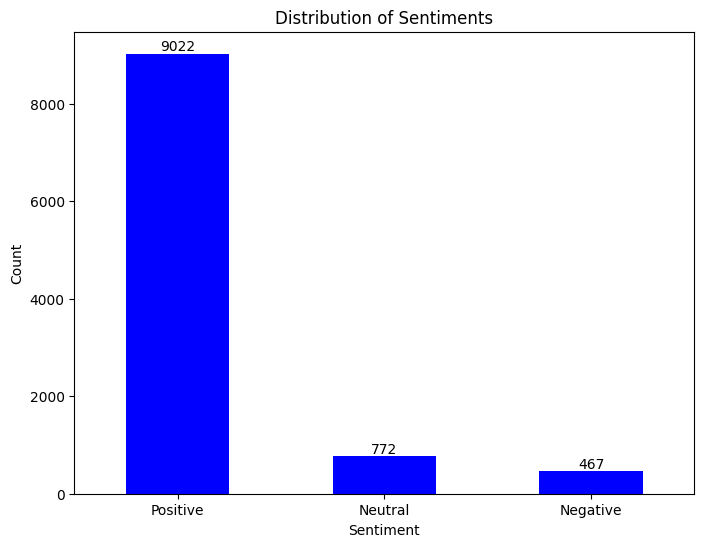

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
data['sentiment'].value_counts().plot(kind='bar', color='blue')
sentiment_counts = data['sentiment'].value_counts()
for i, count in enumerate(sentiment_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(range(len(sentiment_counts)), ['Positive', 'Neutral', 'Negative'],rotation=0) 
plt.show()

In [10]:
data['review']=data['review'].str.lower()

In [11]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
exclude=string.punctuation

In [13]:
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))
data['review']=data['review'].apply(remove_punc)

In [14]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
def remove_stopwords(text):
    new_text=[]
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x=new_text[:]
    new_text.clear()
    return ' '.join(x)
data['review']=data['review'].apply(remove_stopwords)

In [16]:
import nltk
import spacy
nlp = spacy.load('en_core_web_sm')
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])


In [17]:
reviews=data['review']

In [18]:
lemmatized_reviews = [lemmatize_text(review) for review in reviews]
lemmatized_reviews

['  much   write       exactly    suppose   filter    pop sound    recording   much   crisp    one    low price pop filter   amazon   might   well buy    honestly work    despite   pricing good',
 '  product   exactly       quite affordablei    realize    double screen    arrive     even well     expecteda   add bonus one    screen carry   small hint    smell    old grape candy   use   buy    reminiscent sake   can not stop put   pop filter next    nose   smell    recording dif   need   pop filter    work    well    expensive one    may even come    pleasing aroma like mine didbuy   product jake',
 '  primary job    device    block   breath   would otherwise produce   popping sound   allow   voice   pass     noticeable reduction   volume   high frequency   double cloth filter block   pop   let   voice     coloration   metal clamp mount attaches    mike stand secure enough   keep   attach   goose neck need   little coax   stay    put      job well',
 'nice windscreen protect   mxl mic  

In [19]:
data['review']=lemmatized_reviews

In [20]:
data.head()

,review,sentiment
0,much write exactly suppose filt...,1
1,product exactly quite affordablei ...,1
2,primary job device block breath wo...,1
3,nice windscreen protect mxl mic prevent po...,1
4,pop filter great look perform like s...,1


In [21]:
data.head()

,review,sentiment
0,much write exactly suppose filt...,1
1,product exactly quite affordablei ...,1
2,primary job device block breath wo...,1
3,nice windscreen protect mxl mic prevent po...,1
4,pop filter great look perform like s...,1


In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [23]:
x = data['review']
y = data['sentiment']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

X_train_seq = tokenizer.texts_to_sequences(x_train)
X_test_seq = tokenizer.texts_to_sequences(x_test)

vocab_size = len(tokenizer.word_index) + 1

max_length = 50 
X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=max_length)


In [26]:
model = Sequential()
model.add(Input(shape=(50,)))
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
model.add(SimpleRNN(32, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))



model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 50)         │     1,211,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         2,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,214,389 (4.63 MB)

 Trainable params: 1,214,389 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
data.head()

,review,sentiment
0,much write exactly suppose filt...,1
1,product exactly quite affordablei ...,1
2,primary job device block breath wo...,1
3,nice windscreen protect mxl mic prevent po...,1
4,pop filter great look perform like s...,1


In [28]:
reviews

0         much  write      exactly   supposed  filters ...
1         product  exactly      quite affordablei   rea...
2         primary job   device   block  breath  would o...
3        nice windscreen protects  mxl mic  prevents po...
4         pop filter  great  looks  performs like  stud...
                               ...                        
10256                  great   expected thank   five stars
10257    ive  thinking  trying  nanoweb strings        ...
10258      tried coated strings   past including elixir...
10259    well made  elixir  developed  taylor guitars  ...
10260     strings  really quite good   wouldnt call  pe...
Name: review, Length: 10261, dtype: object

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [30]:
reviews = data['review'].values
sentiments = data['sentiment'].values


In [31]:
sentiments

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [32]:
label_encoder = LabelEncoder()
sentiments = label_encoder.fit_transform(sentiments)


In [33]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)
vocab_size = len(tokenizer.word_index) + 1

In [34]:
vocab_size


28157

In [35]:
reviews

array(['  much   write       exactly    suppose   filter    pop sound    recording   much   crisp    one    low price pop filter   amazon   might   well buy    honestly work    despite   pricing good',
       '  product   exactly       quite affordablei    realize    double screen    arrive     even well     expecteda   add bonus one    screen carry   small hint    smell    old grape candy   use   buy    reminiscent sake   can not stop put   pop filter next    nose   smell    recording dif   need   pop filter    work    well    expensive one    may even come    pleasing aroma like mine didbuy   product jake',
       '  primary job    device    block   breath   would otherwise produce   popping sound   allow   voice   pass     noticeable reduction   volume   high frequency   double cloth filter block   pop   let   voice     coloration   metal clamp mount attaches    mike stand secure enough   keep   attach   goose neck need   little coax   stay    put      job well',
       ...,
       

In [36]:
sequences = tokenizer.texts_to_sequences(reviews)
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
print(max_length)

1140


In [37]:
x_train, x_test, y_train, y_test = train_test_split( padded_sequences , sentiments, test_size=0.2, random_state=42)

In [38]:
padded_sequences

array([[  30,  690,  300, ...,    0,    0,    0],
       [  43,  300,  161, ...,    0,    0,    0],
       [1442,  111,  287, ...,    0,    0,    0],
       ...,
       [  44, 1801,    8, ...,    0,    0,    0],
       [   7,   16,  445, ...,    0,    0,    0],
       [   8,   23,  161, ...,    0,    0,    0]])

In [39]:
from tensorflow.keras.utils import to_categorical


In [40]:
num_classes = 3
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [41]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, 100, input_length=max_length),
#     tf.keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

model = Sequential()
model.add(Input(shape=(1140,)))
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(tf.keras.layers.LSTM(100, activation='tanh')) 
model.add(Dense(20, activation='relu')) 
model.add(Dense(3, activation='softmax')) 

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 1140, 100)      │     2,815,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,898,183 (11.06 MB)

 Trainable params: 2,898,183 (11.06 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64)
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.8847 - loss: 0.5198
Epoch 2/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.8782 - loss: 0.4569
Epoch 3/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.8785 - loss: 0.4526
Epoch 4/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.8748 - loss: 0.4618
Epoch 5/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.8799 - loss: 0.4457
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.8787 - loss: 0.4530
Loss: 0.44651123881340027, Accuracy: 0.8811495304107666
